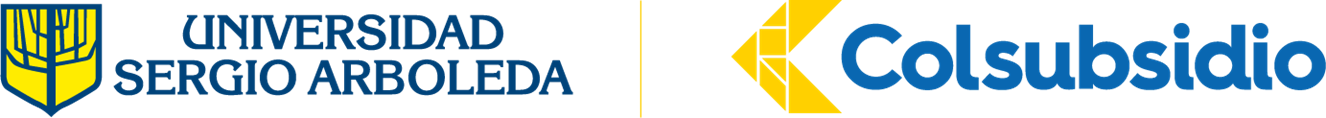


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lfsalasnu/ciberseguridad/blob/main/Modulo%205/Descifrando_contrasenas.ipynb)

# Caso Práctico: Análisis de Resistencia y Descifrado de Contraseñas

> ### ⚠️ **AVISO ÉTICO Y DE SEGURIDAD**
> Este laboratorio tiene fines **estrictamente educativos**. Se diseñó para demostrar empíricamente cómo la complejidad de una contraseña (uso de mayúsculas, minúsculas, números y símbolos) afecta directamente el tiempo necesario para ser descifrada mediante técnicas de fuerza bruta o diccionarios.
> 
> **IMPORTANTE:** > * No utilices estas herramientas sobre sistemas o cuentas de las que no seas propietario o no tengas autorización expresa.
> * El uso de estas técnicas con fines ilícitos es un delito bajo las leyes de ciberseguridad internacionales.
> * El conocimiento aquí adquirido debe utilizarse para **fortalecer la seguridad**, no para vulnerarla.

<img src="https://64.media.tumblr.com/b0516ca0293e8b8068db6eb159433941/tumblr_nkqwugRG3O1s141c3o1_r1_540.gif" width="300">



Este código prueba tres escenarios de complejidad y además incluye:
- Nombre + fecha de nacimiento (info personal).
- Diccionario de contraseñas comunes (123456, password, qwerty, etc.).
- Fuerza bruta con diferentes conjuntos de caracteres.

In [6]:
import itertools
import string
import time

In [11]:
# Entrada del usuario
nombre = input("Ingresa tu nombre (ej. juan): ").lower()
fecha_nac = input("Ingresa tu año de nacimiento: ")
password_objetivo = input("Ingresa la contraseña objetivo (minusculas y numero): ")

Ingresa tu nombre (ej. juan): luis
Ingresa tu año de nacimiento: 1993
Ingresa la contraseña objetivo (minusculas y numero): lf854


In [12]:
%%time
# Diccionario básico de contraseñas comunes
cont_comunes = ["123456", "password", "qwerty", "abc123", "admin",
               nombre+fecha_nac, nombre]

def fuerza_bruta(password, charset, max_len=8):
    for longitud in range(1, max_len+1):
        print(longitud)
        for intento in itertools.product(charset, repeat=longitud):
            intento = "".join(intento)
            if intento == password:
                return intento
    return None

# 1. Revisar en el diccionario
if password_objetivo in cont_comunes:
    print(f"Contraseña encontrada en diccionario: {password_objetivo}")
else:
    # 2. Fuerza bruta simple
    charset = string.ascii_lowercase + string.digits
    encontrada = fuerza_bruta(password_objetivo, charset)
    if encontrada:
        print(f"Contraseña encontrada por fuerza bruta: {encontrada}")
    else:
        print("No encontrada (muy fuerte o requiere más tiempo)")


1
2
3
4
5
Contraseña encontrada por fuerza bruta: lf854
CPU times: user 3.51 s, sys: 2.98 ms, total: 3.52 s
Wall time: 3.56 s


In [13]:
%%time
password_objetivo = input("Ingresa la contraseña objetivo (mayusculas, minusculas y numeros): ")

cont_comunes = ["123456", "password", "qwerty", "abc123", "admin",
               nombre+fecha_nac, nombre.capitalize()+fecha_nac]

def fuerza_bruta(password, charset, max_len=8):
    for longitud in range(1, max_len+1):
        print(longitud)
        for intento in itertools.product(charset, repeat=longitud):
            intento = "".join(intento)
            if intento == password:
                return intento
    return None

if password_objetivo in cont_comunes:
    print(f"Contraseña encontrada en diccionario: {password_objetivo}")
else:
    # 2. Fuerza bruta media
    charset = string.ascii_letters + string.digits
    encontrada = fuerza_bruta(password_objetivo, charset)
    if encontrada:
        print(f"Contraseña encontrada por fuerza bruta: {encontrada}")
    else:
        print("No encontrada (muy fuerte o requiere más tiempo)")

Ingresa la contraseña objetivo (mayusculas, minusculas y numeros): Lf854
1
2
3
4
5
Contraseña encontrada por fuerza bruta: Lf854
CPU times: user 1min 18s, sys: 47.9 ms, total: 1min 18s
Wall time: 1min 32s


In [14]:
%%time

password_objetivo = input("Ingresa la contraseña objetivo (mayusculas, minusculas, caracteres especiales y numeros): ")

cont_comunes = ["123456", "password", "qwerty", "abc123", "admin",
               nombre+fecha_nac, nombre.capitalize()+fecha_nac,
               nombre.capitalize()+fecha_nac+"!"]

def fuerza_bruta(password, charset, max_len=8):
    for longitud in range(1, max_len+1):
        print(longitud)
        for intento in itertools.product(charset, repeat=longitud):
            intento = "".join(intento)
            if intento == password:
                return intento
    return None

# 1. Revisar en diccionario
if password_objetivo in cont_comunes:
    print(f"Contraseña encontrada en diccionario: {password_objetivo}")
else:
    # 2. Fuerza bruta fuerte
    charset = string.ascii_letters + string.digits + string.punctuation
    encontrada = fuerza_bruta(password_objetivo, charset, max_len=6)  # límite para que no tarde demasiado
    if encontrada:
        print(f"Contraseña encontrada por fuerza bruta: {encontrada}")
    else:
        print("No encontrada (demasiado fuerte o requiere más recursos)")


Ingresa la contraseña objetivo (mayusculas, minusculas, caracteres especiales y numeros): Lf85!
1
2
3
4
5
Contraseña encontrada por fuerza bruta: Lf85!
CPU times: user 6min 46s, sys: 161 ms, total: 6min 46s
Wall time: 6min 57s
